In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [301]:
df = pd.read_csv('./Train_Data.csv')

In [302]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1096,1097,70,RM,60.0,6882,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,127000
1097,1098,120,RL,NaN,3696,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,170000
1098,1099,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,128000


In [303]:
columns = df.columns

In [304]:
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1100 non-null   int64  
 1   MSSubClass     1100 non-null   int64  
 2   MSZoning       1100 non-null   object 
 3   LotFrontage    908 non-null    float64
 4   LotArea        1100 non-null   int64  
 5   Street         1100 non-null   object 
 6   Alley          69 non-null     object 
 7   LotShape       1100 non-null   object 
 8   LandContour    1100 non-null   object 
 9   Utilities      1100 non-null   object 
 10  LotConfig      1100 non-null   object 
 11  LandSlope      1100 non-null   object 
 12  Neighborhood   1100 non-null   object 
 13  Condition1     1100 non-null   object 
 14  Condition2     1100 non-null   object 
 15  BldgType       1100 non-null   object 
 16  HouseStyle     1100 non-null   object 
 17  OverallQual    1100 non-null   int64  
 18  OverallC

## Cleaning data/ Data Preprocessing

In [306]:
columns_to_drop = ['Id','Alley','PoolQC','MiscFeature']
df.drop(columns = columns_to_drop, inplace = True)

In [307]:
np.unique(df['Street'].values,return_counts=True) #Street columns isn't very important ==> can be dropped

(array(['Grvl', 'Pave'], dtype=object), array([   5, 1095], dtype=int64))

In [308]:
np.unique(df['Utilities'].values,return_counts=True)# Utilities is also not important feature

(array(['AllPub', 'NoSeWa'], dtype=object), array([1099,    1], dtype=int64))

In [309]:
np.unique(df['LotShape'].values,return_counts=True)

(array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array([366,  36,   4, 694], dtype=int64))

In [310]:
columns_to_drop = ['Street','Utilities']
df.drop(columns = columns_to_drop, inplace = True)

In [311]:
np.unique(df['Electrical'].values,return_counts=True)#not very important feature

(array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype=object),
 array([  73,   20,    3,    1, 1003], dtype=int64))

In [312]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [313]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,78.000000,9317,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,NaN,0,3,2007,WD,Normal,176432
1096,70,RM,60.000000,6882,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,...,0,0,0,NaN,0,3,2007,WD,Normal,127000
1097,120,RL,69.618943,3696,Reg,Lvl,Inside,Gtl,StoneBr,Norm,...,0,0,0,NaN,0,10,2007,WD,Normal,170000
1098,50,RM,50.000000,6000,Reg,Lvl,Inside,Gtl,BrkSide,Norm,...,0,0,0,NaN,0,7,2009,WD,Normal,128000


In [314]:
df['FireplaceQu'].fillna('NA',inplace=True)

In [315]:
np.unique(df['FireplaceQu'].values,return_counts=True)

(array(['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA'], dtype=object),
 array([ 18,  26, 282, 524,  16, 234], dtype=int64))

In [316]:
df['Fence'].fillna('NA',inplace=True)

In [317]:
df['GarageQual'].fillna('NA',inplace=True)
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)
df['GarageType'].fillna('NA',inplace=True)

In [318]:
df['GarageYrBlt'].fillna(0,inplace=True)

In [319]:
df['BsmtFinType1'].fillna('NA',inplace=True)

In [320]:
df['BsmtFinType2'].fillna('NA',inplace=True)

In [321]:
df['BsmtQual'].fillna('NA',inplace=True)
df['BsmtCond'].fillna('NA',inplace=True)
df['BsmtExposure'].fillna('NA',inplace=True)

In [322]:
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)

In [323]:
np.unique(df['LandContour'].values,return_counts=True) #Not very important feature

(array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array([ 42,  39,  28, 991], dtype=int64))

In [324]:
cols_to_encode = df.columns[df.dtypes == 'object']

In [325]:
print(cols_to_encode)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


### Encoding Categorical Data

In [326]:
from sklearn.preprocessing import LabelEncoder

In [328]:
le = LabelEncoder()
df[cols_to_encode] = df[cols_to_encode].apply(le.fit_transform)

In [329]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.000000,8450,3,3,4,0,5,2,...,0,0,0,4,0,2,2008,8,4,208500
1,20,3,80.000000,9600,3,3,2,0,24,1,...,0,0,0,4,0,5,2007,8,4,181500
2,60,3,68.000000,11250,0,3,4,0,5,2,...,0,0,0,4,0,9,2008,8,4,223500
3,70,3,60.000000,9550,0,3,0,0,6,2,...,0,0,0,4,0,2,2006,8,0,140000
4,60,3,84.000000,14260,0,3,2,0,15,2,...,0,0,0,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,3,78.000000,9317,0,3,4,0,5,2,...,0,0,0,4,0,3,2007,8,4,176432
1096,70,4,60.000000,6882,3,3,4,0,9,2,...,0,0,0,4,0,3,2007,8,4,127000
1097,120,3,69.618943,3696,3,3,4,0,22,2,...,0,0,0,4,0,10,2007,8,4,170000
1098,50,4,50.000000,6000,3,3,4,0,3,2,...,0,0,0,4,0,7,2009,8,4,128000


In [330]:
cor_table = df.corr()[['SalePrice']]

In [331]:
cor_table.sort_values(by='SalePrice',inplace=True)

In [332]:
filter1 = cor_table[cor_table['SalePrice'].values <= 0.1]

In [333]:
filter2 = filter1[filter1['SalePrice'].values >= -0.1]

In [334]:
columns_to_drop = filter2.index

In [335]:
columns_to_drop

Index(['Heating', 'BsmtFinType1', 'BldgType', 'MSSubClass', 'OverallCond',
       'SaleType', 'LotConfig', 'MiscVal', 'YrSold', 'LowQualFinSF',
       'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch', 'LandContour', 'Condition2',
       'PoolArea', 'MasVnrType', 'MoSold', 'LandSlope', 'Condition1',
       'BsmtFinType2', 'BsmtCond'],
      dtype='object')

In [336]:
df_final = df.drop(columns = columns_to_drop)

In [337]:
df_final

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,SaleCondition,SalePrice
0,3,65.000000,8450,3,5,5,7,2003,2003,1,...,5,5,2,0,61,0,0,4,4,208500
1,3,80.000000,9600,3,24,2,6,1976,1976,1,...,5,5,2,298,0,0,0,4,4,181500
2,3,68.000000,11250,0,5,5,7,2001,2002,1,...,5,5,2,0,42,0,0,4,4,223500
3,3,60.000000,9550,0,6,5,7,1915,1970,1,...,5,5,2,0,35,272,0,4,0,140000
4,3,84.000000,14260,0,15,5,8,2000,2000,1,...,5,5,2,192,84,0,0,4,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,3,78.000000,9317,0,5,2,6,2006,2006,1,...,5,5,2,0,22,0,0,4,4,176432
1096,4,60.000000,6882,3,9,5,6,1914,2006,1,...,3,3,2,136,0,115,0,4,4,127000
1097,3,69.618943,3696,3,22,2,8,1986,1986,1,...,5,5,2,0,74,137,0,4,4,170000
1098,4,50.000000,6000,3,3,0,4,1936,1950,1,...,5,5,2,0,0,0,0,4,4,128000


In [338]:
data = df_final.values
X = data[:,:-1]
Y = data[:,-1]

In [339]:
X.shape,Y.shape

((1100, 52), (1100,))

In [388]:
type(X)

numpy.ndarray

In [340]:
X.dtype,Y.dtype

(dtype('float64'), dtype('float64'))

## Making our Model and Training it

In [341]:
from keras import models
from keras.layers import Dense

In [548]:
model = models.Sequential()
model.add(Dense(72,activation='relu',input_shape=(52,)))# for first layer(input layer), we need to specify the input size
model.add(Dense(54,activation='relu')) #no need to specify the input size, it will know form previous layer
model.add(Dense(36,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(1,activation='linear'))

In [549]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 72)                3816      
_________________________________________________________________
dense_77 (Dense)             (None, 54)                3942      
_________________________________________________________________
dense_78 (Dense)             (None, 36)                1980      
_________________________________________________________________
dense_79 (Dense)             (None, 18)                666       
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 19        
Total params: 10,423
Trainable params: 10,423
Non-trainable params: 0
_________________________________________________________________


In [550]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [564]:
hist = model.fit(X,Y,epochs=1000,batch_size=256)

Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 459243456.0000 - mse: 459243456.0000
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 456415712.0000 - mse: 456415712.0000
Epoch 3/1000
5/5 [==============================] - 0s 3ms/step - loss: 462154528.0000 - mse: 462154528.0000
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 458717632.0000 - mse: 458717632.0000
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 461881888.0000 - mse: 461881888.0000
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: 469316160.0000 - mse: 469316160.0000
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: 474761920.0000 - mse: 474761920.0000
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 503217824.0000 - mse: 503217824.0000
Epoch 9/1000
5/5 [==============================] - 0s 2ms/step - loss: 487030560.0000 - mse: 487030560.0000
Epoch 10/1000
5/5 [

5/5 [==============================] - 0s 3ms/step - loss: 476896640.0000 - mse: 476896640.0000
Epoch 76/1000
5/5 [==============================] - 0s 2ms/step - loss: 473979200.0000 - mse: 473979200.0000
Epoch 77/1000
5/5 [==============================] - 0s 2ms/step - loss: 448856000.0000 - mse: 448856000.0000
Epoch 78/1000
5/5 [==============================] - 0s 2ms/step - loss: 453215072.0000 - mse: 453215072.0000
Epoch 79/1000
5/5 [==============================] - 0s 2ms/step - loss: 461614848.0000 - mse: 461614848.0000
Epoch 80/1000
5/5 [==============================] - 0s 2ms/step - loss: 476404672.0000 - mse: 476404672.0000
Epoch 81/1000
5/5 [==============================] - 0s 2ms/step - loss: 468990752.0000 - mse: 468990752.0000
Epoch 82/1000
5/5 [==============================] - 0s 2ms/step - loss: 452205120.0000 - mse: 452205120.0000
Epoch 83/1000
5/5 [==============================] - 0s 2ms/step - loss: 494920480.0000 - mse: 494920480.0000
Epoch 84/1000
5/5 [=====

5/5 [==============================] - 0s 3ms/step - loss: 481230272.0000 - mse: 481230272.0000
Epoch 150/1000
5/5 [==============================] - 0s 3ms/step - loss: 453646016.0000 - mse: 453646016.0000
Epoch 151/1000
5/5 [==============================] - 0s 2ms/step - loss: 471774112.0000 - mse: 471774112.0000
Epoch 152/1000
5/5 [==============================] - 0s 2ms/step - loss: 481159296.0000 - mse: 481159296.0000
Epoch 153/1000
5/5 [==============================] - 0s 2ms/step - loss: 472472224.0000 - mse: 472472224.0000
Epoch 154/1000
5/5 [==============================] - 0s 2ms/step - loss: 458535168.0000 - mse: 458535168.0000
Epoch 155/1000
5/5 [==============================] - 0s 3ms/step - loss: 475379424.0000 - mse: 475379424.0000
Epoch 156/1000
5/5 [==============================] - 0s 3ms/step - loss: 497755328.0000 - mse: 497755328.0000
Epoch 157/1000
5/5 [==============================] - 0s 2ms/step - loss: 455397728.0000 - mse: 455397728.0000
Epoch 158/1000
5

5/5 [==============================] - 0s 2ms/step - loss: 491327744.0000 - mse: 491327744.0000
Epoch 223/1000
5/5 [==============================] - 0s 2ms/step - loss: 442776256.0000 - mse: 442776256.0000
Epoch 224/1000
5/5 [==============================] - 0s 2ms/step - loss: 450534912.0000 - mse: 450534912.0000
Epoch 225/1000
5/5 [==============================] - 0s 2ms/step - loss: 431021024.0000 - mse: 431021024.0000
Epoch 226/1000
5/5 [==============================] - 0s 2ms/step - loss: 432026016.0000 - mse: 432026016.0000
Epoch 227/1000
5/5 [==============================] - 0s 2ms/step - loss: 452558176.0000 - mse: 452558176.0000
Epoch 228/1000
5/5 [==============================] - 0s 3ms/step - loss: 436010464.0000 - mse: 436010464.0000
Epoch 229/1000
5/5 [==============================] - 0s 3ms/step - loss: 436860064.0000 - mse: 436860064.0000
Epoch 230/1000
5/5 [==============================] - 0s 3ms/step - loss: 450749472.0000 - mse: 450749472.0000
Epoch 231/1000
5

5/5 [==============================] - 0s 2ms/step - loss: 426499456.0000 - mse: 426499456.0000
Epoch 296/1000
5/5 [==============================] - 0s 2ms/step - loss: 433729408.0000 - mse: 433729408.0000
Epoch 297/1000
5/5 [==============================] - 0s 2ms/step - loss: 436634816.0000 - mse: 436634816.0000
Epoch 298/1000
5/5 [==============================] - 0s 2ms/step - loss: 421426496.0000 - mse: 421426496.0000
Epoch 299/1000
5/5 [==============================] - 0s 2ms/step - loss: 446247552.0000 - mse: 446247552.0000
Epoch 300/1000
5/5 [==============================] - 0s 3ms/step - loss: 428106368.0000 - mse: 428106368.0000
Epoch 301/1000
5/5 [==============================] - 0s 3ms/step - loss: 430704640.0000 - mse: 430704640.0000
Epoch 302/1000
5/5 [==============================] - 0s 2ms/step - loss: 420562048.0000 - mse: 420562048.0000
Epoch 303/1000
5/5 [==============================] - 0s 3ms/step - loss: 426446624.0000 - mse: 426446624.0000
Epoch 304/1000
5

5/5 [==============================] - 0s 3ms/step - loss: 450328704.0000 - mse: 450328704.0000
Epoch 369/1000
5/5 [==============================] - 0s 3ms/step - loss: 438051584.0000 - mse: 438051584.0000
Epoch 370/1000
5/5 [==============================] - 0s 2ms/step - loss: 429878912.0000 - mse: 429878912.0000
Epoch 371/1000
5/5 [==============================] - 0s 2ms/step - loss: 416902944.0000 - mse: 416902944.0000
Epoch 372/1000
5/5 [==============================] - 0s 3ms/step - loss: 420758816.0000 - mse: 420758816.0000
Epoch 373/1000
5/5 [==============================] - 0s 3ms/step - loss: 430014656.0000 - mse: 430014656.0000
Epoch 374/1000
5/5 [==============================] - 0s 3ms/step - loss: 443100512.0000 - mse: 443100512.0000
Epoch 375/1000
5/5 [==============================] - 0s 3ms/step - loss: 431188960.0000 - mse: 431188960.0000
Epoch 376/1000
5/5 [==============================] - 0s 3ms/step - loss: 423500256.0000 - mse: 423500256.0000
Epoch 377/1000
5

5/5 [==============================] - 0s 2ms/step - loss: 444337760.0000 - mse: 444337760.0000
Epoch 442/1000
5/5 [==============================] - 0s 2ms/step - loss: 462411584.0000 - mse: 462411584.0000
Epoch 443/1000
5/5 [==============================] - 0s 3ms/step - loss: 481579264.0000 - mse: 481579264.0000
Epoch 444/1000
5/5 [==============================] - 0s 2ms/step - loss: 495243232.0000 - mse: 495243232.0000
Epoch 445/1000
5/5 [==============================] - 0s 3ms/step - loss: 415902656.0000 - mse: 415902656.0000
Epoch 446/1000
5/5 [==============================] - 0s 3ms/step - loss: 422304800.0000 - mse: 422304832.0000
Epoch 447/1000
5/5 [==============================] - 0s 3ms/step - loss: 420615712.0000 - mse: 420615712.0000
Epoch 448/1000
5/5 [==============================] - 0s 3ms/step - loss: 422996992.0000 - mse: 422996992.0000
Epoch 449/1000
5/5 [==============================] - ETA: 0s - loss: 353170112.0000 - mse: 353170112.000 - 0s 7ms/step - loss:

Epoch 514/1000
5/5 [==============================] - 0s 3ms/step - loss: 439960960.0000 - mse: 439960960.0000
Epoch 515/1000
5/5 [==============================] - 0s 3ms/step - loss: 471874976.0000 - mse: 471874976.0000
Epoch 516/1000
5/5 [==============================] - 0s 3ms/step - loss: 501616544.0000 - mse: 501616544.0000
Epoch 517/1000
5/5 [==============================] - 0s 3ms/step - loss: 465384992.0000 - mse: 465384992.0000
Epoch 518/1000
5/5 [==============================] - 0s 3ms/step - loss: 430179072.0000 - mse: 430179072.0000
Epoch 519/1000
5/5 [==============================] - 0s 3ms/step - loss: 429934400.0000 - mse: 429934400.0000
Epoch 520/1000
5/5 [==============================] - 0s 3ms/step - loss: 459732896.0000 - mse: 459732896.0000
Epoch 521/1000
5/5 [==============================] - 0s 3ms/step - loss: 466575456.0000 - mse: 466575456.0000
Epoch 522/1000
5/5 [==============================] - 0s 3ms/step - loss: 436379136.0000 - mse: 436379136.0000
E

5/5 [==============================] - 0s 2ms/step - loss: 467961056.0000 - mse: 467961056.0000
Epoch 588/1000
5/5 [==============================] - 0s 2ms/step - loss: 487175776.0000 - mse: 487175776.0000
Epoch 589/1000
5/5 [==============================] - 0s 3ms/step - loss: 422969824.0000 - mse: 422969824.0000
Epoch 590/1000
5/5 [==============================] - 0s 2ms/step - loss: 413449696.0000 - mse: 413449664.0000
Epoch 591/1000
5/5 [==============================] - 0s 2ms/step - loss: 399089408.0000 - mse: 399089408.0000
Epoch 592/1000
5/5 [==============================] - 0s 3ms/step - loss: 426121312.0000 - mse: 426121312.0000
Epoch 593/1000
5/5 [==============================] - 0s 3ms/step - loss: 430810848.0000 - mse: 430810848.0000
Epoch 594/1000
5/5 [==============================] - 0s 2ms/step - loss: 502500544.0000 - mse: 502500544.0000
Epoch 595/1000
5/5 [==============================] - 0s 2ms/step - loss: 428970016.0000 - mse: 428970016.0000
Epoch 596/1000
5

5/5 [==============================] - 0s 3ms/step - loss: 393368928.0000 - mse: 393368928.0000
Epoch 661/1000
5/5 [==============================] - 0s 2ms/step - loss: 411636224.0000 - mse: 411636224.0000
Epoch 662/1000
5/5 [==============================] - 0s 3ms/step - loss: 406896192.0000 - mse: 406896192.0000
Epoch 663/1000
5/5 [==============================] - 0s 3ms/step - loss: 408276352.0000 - mse: 408276352.0000
Epoch 664/1000
5/5 [==============================] - 0s 3ms/step - loss: 420705152.0000 - mse: 420705152.0000
Epoch 665/1000
5/5 [==============================] - 0s 2ms/step - loss: 423784128.0000 - mse: 423784128.0000
Epoch 666/1000
5/5 [==============================] - 0s 2ms/step - loss: 399187936.0000 - mse: 399187936.0000
Epoch 667/1000
5/5 [==============================] - 0s 3ms/step - loss: 401596320.0000 - mse: 401596320.0000
Epoch 668/1000
5/5 [==============================] - 0s 2ms/step - loss: 393931744.0000 - mse: 393931744.0000
Epoch 669/1000
5

5/5 [==============================] - 0s 2ms/step - loss: 414176960.0000 - mse: 414176960.0000
Epoch 734/1000
5/5 [==============================] - 0s 2ms/step - loss: 425866272.0000 - mse: 425866272.0000
Epoch 735/1000
5/5 [==============================] - 0s 2ms/step - loss: 417969920.0000 - mse: 417969920.0000
Epoch 736/1000
5/5 [==============================] - 0s 3ms/step - loss: 398247616.0000 - mse: 398247616.0000
Epoch 737/1000
5/5 [==============================] - 0s 2ms/step - loss: 401858336.0000 - mse: 401858336.0000
Epoch 738/1000
5/5 [==============================] - 0s 2ms/step - loss: 390788160.0000 - mse: 390788160.0000
Epoch 739/1000
5/5 [==============================] - 0s 3ms/step - loss: 392815392.0000 - mse: 392815392.0000
Epoch 740/1000
5/5 [==============================] - 0s 3ms/step - loss: 409880928.0000 - mse: 409880928.0000
Epoch 741/1000
5/5 [==============================] - 0s 2ms/step - loss: 401607456.0000 - mse: 401607456.0000
Epoch 742/1000
5

5/5 [==============================] - 0s 2ms/step - loss: 384300608.0000 - mse: 384300608.0000
Epoch 807/1000
5/5 [==============================] - 0s 2ms/step - loss: 422663264.0000 - mse: 422663264.0000
Epoch 808/1000
5/5 [==============================] - 0s 2ms/step - loss: 394628704.0000 - mse: 394628704.0000
Epoch 809/1000
5/5 [==============================] - 0s 2ms/step - loss: 387491168.0000 - mse: 387491168.0000
Epoch 810/1000
5/5 [==============================] - 0s 2ms/step - loss: 412284960.0000 - mse: 412284960.0000
Epoch 811/1000
5/5 [==============================] - 0s 3ms/step - loss: 380893728.0000 - mse: 380893728.0000
Epoch 812/1000
5/5 [==============================] - 0s 3ms/step - loss: 419808928.0000 - mse: 419808928.0000
Epoch 813/1000
5/5 [==============================] - 0s 2ms/step - loss: 410064480.0000 - mse: 410064480.0000
Epoch 814/1000
5/5 [==============================] - 0s 2ms/step - loss: 397297568.0000 - mse: 397297568.0000
Epoch 815/1000
5

5/5 [==============================] - 0s 2ms/step - loss: 400885760.0000 - mse: 400885760.0000
Epoch 880/1000
5/5 [==============================] - 0s 2ms/step - loss: 380271552.0000 - mse: 380271552.0000
Epoch 881/1000
5/5 [==============================] - 0s 2ms/step - loss: 376450304.0000 - mse: 376450304.0000
Epoch 882/1000
5/5 [==============================] - 0s 3ms/step - loss: 381585280.0000 - mse: 381585280.0000
Epoch 883/1000
5/5 [==============================] - 0s 2ms/step - loss: 378956704.0000 - mse: 378956704.0000
Epoch 884/1000
5/5 [==============================] - 0s 2ms/step - loss: 375971424.0000 - mse: 375971424.0000
Epoch 885/1000
5/5 [==============================] - 0s 2ms/step - loss: 374953312.0000 - mse: 374953312.0000
Epoch 886/1000
5/5 [==============================] - 0s 2ms/step - loss: 378895200.0000 - mse: 378895200.0000
Epoch 887/1000
5/5 [==============================] - 0s 2ms/step - loss: 387897632.0000 - mse: 387897632.0000
Epoch 888/1000
5

5/5 [==============================] - 0s 2ms/step - loss: 376829984.0000 - mse: 376829984.0000
Epoch 953/1000
5/5 [==============================] - 0s 2ms/step - loss: 393660160.0000 - mse: 393660160.0000
Epoch 954/1000
5/5 [==============================] - 0s 2ms/step - loss: 389358688.0000 - mse: 389358688.0000
Epoch 955/1000
5/5 [==============================] - 0s 2ms/step - loss: 372375424.0000 - mse: 372375424.0000
Epoch 956/1000
5/5 [==============================] - 0s 2ms/step - loss: 373861472.0000 - mse: 373861472.0000
Epoch 957/1000
5/5 [==============================] - 0s 2ms/step - loss: 378494944.0000 - mse: 378494944.0000
Epoch 958/1000
5/5 [==============================] - 0s 2ms/step - loss: 374255232.0000 - mse: 374255232.0000
Epoch 959/1000
5/5 [==============================] - 0s 2ms/step - loss: 370434240.0000 - mse: 370434240.0000
Epoch 960/1000
5/5 [==============================] - 0s 2ms/step - loss: 377430944.0000 - mse: 377430944.0000
Epoch 961/1000
5

In [565]:
h = hist.history

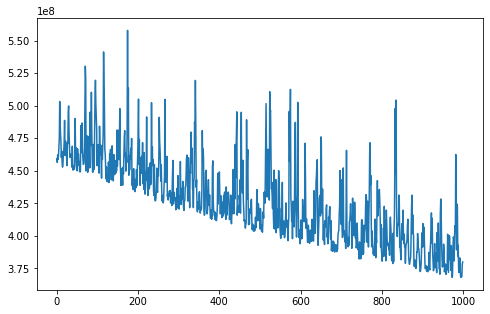

In [566]:
plt.figure(figsize=(8,5))
plt.plot(h['loss'])
plt.show()

In [567]:
pred_train = model.predict(X)

In [568]:
pred_train = pred_train.reshape((-1,))

In [569]:
Y-pred_train

array([-1590.      ,  5093.875   ,  6855.75    , ..., 12715.6875  ,
       17967.171875,   978.296875])

In [444]:
test_df = pd.read_csv('./Test_data.csv')

In [367]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
1,1102,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2,1103,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
3,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
4,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
356,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
357,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
358,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [368]:
to_drop = ['Id','Alley','PoolQC','MiscFeature','Street','Utilities','Heating', 'BsmtFinType1', 'BldgType', 'MSSubClass', 'OverallCond',
       'SaleType', 'LotConfig', 'MiscVal', 'YrSold', 'LowQualFinSF',
       'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch', 'LandContour', 'Condition2',
       'PoolArea', 'MasVnrType', 'MoSold', 'LandSlope', 'Condition1',
       'BsmtFinType2', 'BsmtCond']

In [369]:
test_df.drop(columns = to_drop,inplace=True)

In [371]:
test_df['FireplaceQu'].fillna('NA',inplace=True)
test_df['Fence'].fillna('NA',inplace=True)
test_df['GarageCond'].fillna('NA',inplace=True)
test_df['GarageQual'].fillna('NA',inplace=True)
test_df['GarageYrBlt'].fillna('NA',inplace=True)
test_df['GarageType'].fillna('NA',inplace=True)
test_df['GarageFinish'].fillna('NA',inplace=True)

In [372]:
# np.unique(test_df['Electrical'].values,return_counts=True)
test_df['Electrical'].fillna('SBrkr',inplace=True)

In [374]:
test_df['BsmtQual'].fillna('NA',inplace=True)
test_df['BsmtExposure'].fillna('NA',inplace=True)

In [375]:
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(),inplace=True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(),inplace=True)

In [377]:
to_encode = test_df.columns[test_df.dtypes == 'object']

In [378]:
to_encode = test_df[to_encode].drop(columns='GarageYrBlt').columns

In [383]:
test_df[to_encode] = test_df[to_encode].apply(le.fit_transform)

In [384]:
test_df

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,SaleCondition
0,3,60.0,8400,3,17,2,2,1920,1950,1,...,246,3,4,0,0,0,0,0,4,3
1,3,61.0,9758,0,11,2,5,1971,1971,1,...,280,3,4,2,0,0,0,0,4,3
2,3,70.0,7000,3,11,2,5,1960,2002,1,...,254,3,4,2,0,16,0,0,3,2
3,3,79.0,8910,3,11,2,6,1959,1959,3,...,539,3,4,2,0,0,192,0,4,3
4,4,24.0,2016,3,1,5,5,1970,1970,1,...,440,3,4,2,0,0,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,3,62.0,7917,3,7,5,6,1999,2000,1,...,460,3,4,2,0,40,0,0,4,3
356,3,85.0,13175,3,13,2,6,1978,1988,1,...,500,3,4,2,349,0,0,0,2,3
357,3,66.0,9042,3,5,5,7,1941,2006,1,...,252,3,4,2,0,60,0,0,0,3
358,3,68.0,9717,3,11,2,5,1950,1996,3,...,240,3,4,2,366,0,112,0,4,3


In [416]:
test_df['GarageYrBlt'].fillna(0,inplace=True)

In [ ]:
test_df[['GarageYrBlt']].where

In [419]:
test_data = test_df.values

In [420]:
Xt = test_data[:,:]

In [570]:
pred_test = model.predict(Xt)

In [571]:
pred_test

array([[ 55138.74 ],
       [ 96229.31 ],
       [120197.29 ],
       [132650.88 ],
       [103240.12 ],
       [332276.8  ],
       [180243.64 ],
       [238242.58 ],
       [153257.75 ],
       [329717.8  ],
       [164732.83 ],
       [163468.95 ],
       [101185.03 ],
       [115397.875],
       [ 99791.23 ],
       [282894.   ],
       [166858.   ],
       [122792.94 ],
       [109899.2  ],
       [107168.04 ],
       [ 99980.69 ],
       [196677.98 ],
       [ 89952.66 ],
       [ 89346.78 ],
       [158749.08 ],
       [112213.74 ],
       [188571.38 ],
       [211430.69 ],
       [202618.88 ],
       [127337.03 ],
       [160296.86 ],
       [ 95914.89 ],
       [150633.33 ],
       [219998.56 ],
       [167059.56 ],
       [ 98305.734],
       [ 96387.586],
       [ 80717.61 ],
       [227461.39 ],
       [102723.75 ],
       [112175.09 ],
       [162665.17 ],
       [331017.8  ],
       [ 89529.83 ],
       [ 96201.93 ],
       [115633.39 ],
       [154041.84 ],
       [15454

In [465]:
reload_test = pd.read_csv('./Test_Data.csv')

In [466]:
ids = reload_test.values[:,0]

In [467]:
ids = ids.reshape((-1,1))

In [572]:
sub = np.concatenate((ids,pred_test),axis=1)

In [573]:
sub.shape

(360, 2)

In [574]:
sub = pd.DataFrame(sub,columns=['Id','SalePrice'])

In [575]:
sub.to_csv('./my_submission.csv',index=False)